# Germany Car Accidents Analysis  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('file/New_table.xlsx', sheet_name='Sheet1')
df.head(800)

,Year,Months,Location,Personal Injury Accidents,Serious Accidents (Material Damage),Other Accidents (Intoxication),Other Accidents (Material Damage),Total Accidents
0,2011,January,Inside built-up areas,10595.0,3893.0,970.0,114745.0,130203.0
1,2011,January,Outside built-up areas (excl. motorways/freeways),4995.0,2137.0,181.0,31161.0,38474.0
2,2011,January,On motorways/freeways,1250.0,1094.0,45.0,8985.0,11374.0
3,2011,January,Total,16840.0,7124.0,1196.0,154891.0,180051.0
4,2011,February,Inside built-up areas,11008.0,3548.0,889.0,105064.0,120509.0
...,...,...,...,...,...,...,...,...
667,2024,November,Total,20679.0,5773.0,1143.0,186199.0,213794.0
668,2024,December,Inside built-up areas,NaN,NaN,NaN,NaN,NaN
669,2024,December,Outside built-up areas (excl. motorways/freeways),NaN,NaN,NaN,NaN,NaN
670,2024,December,On motorways/freeways,NaN,NaN,NaN,NaN,NaN


In [12]:
df.columns

Index(['Year', 'Months', 'Location', 'Personal Injury Accidents',
       'Serious Accidents (Material Damage)', 'Other Accidents (Intoxication)',
       'Other Accidents (Material Damage)', 'Total Accidents'],
      dtype='object')

In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Year                                   0
Months                                 0
Location                               0
Personal Injury Accidents              4
Serious Accidents (Material Damage)    4
Other Accidents (Intoxication)         4
Other Accidents (Material Damage)      4
Total Accidents                        4
dtype: int64


## 1. Annual Accident Trends by Location
- ### Classify accidents by year and location

In [14]:
# Group by year and location, summing Total Accidents
accidents_by_year_location = (
    df.groupby(['Year', 'Location'])[['Total Accidents']]  
    .sum() 
    .unstack()
)

accidents_by_year_location = accidents_by_year_location.rename(columns={
    'Inside built-up areas': 'Urban',
    'On motorways/freeways': 'Highway',
    'Outside built-up areas (excl. motorways/freeways)': 'Non-urban'
})

print("Total Accidents by Year and Location:")
print(accidents_by_year_location)


Total Accidents by Year and Location:
         Total Accidents                                
Location           Urban    Highway Non-urban      Total
Year                                                    
2011            893313.0  1457112.0  203357.0  3867488.0
2012           1751166.0   150943.0  499734.0  2401843.0
2013           1769104.0   152173.0  492734.0  2414011.0
2014           1789278.0   151794.0  465613.0  2406685.0
2015           1854919.0   161096.0  500816.0  2516831.0
2016           1903429.0   174067.0  507831.0  2585327.0
2017           1934538.0   178861.0  529699.0  2643098.0
2018           2002482.0   175995.0  514178.0  2636468.0
2019           2100324.0   177981.0  531842.0  2682144.0
2020           1803696.0   130131.0  469827.0  2198716.0
2021           1732590.0   140525.0  432274.0  2300669.0
2022           1611162.0   147397.0  400334.0  2219050.0
2023           1838802.0   165131.0  508966.0  2512899.0
2024           1687834.0   150728.0  449020.0  228

C:\Users\milos\AppData\Local\Temp\ipykernel_41220\3663176140.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(accidents_by_year_location.index, accidents_by_year_location[location], marker='o', label=location)


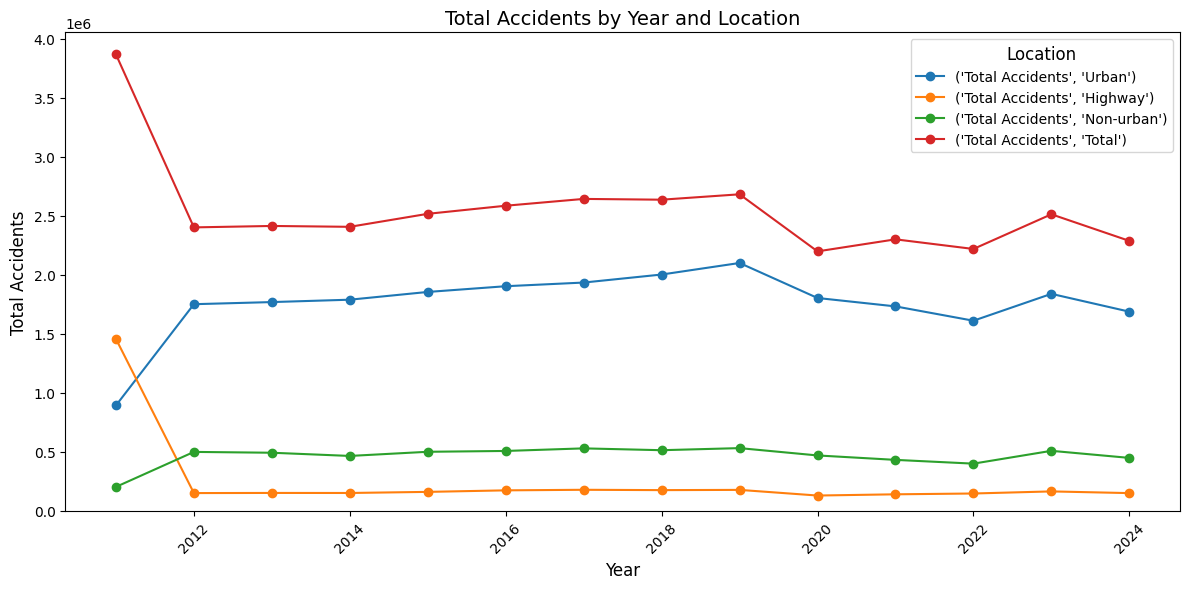

In [15]:
plt.figure(figsize=(12, 6))

# Plot each location's accident trend over the years
for location in accidents_by_year_location.columns:
    plt.plot(accidents_by_year_location.index, accidents_by_year_location[location], marker='o', label=location)

# Adding title and labels
plt.title("Total Accidents by Year and Location", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Accidents", fontsize=12)

# Adding the legend
plt.legend(title="Location", title_fontsize=12, fontsize=10)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

plt.ylim(bottom=0)

# Display the plot
plt.tight_layout()
plt.show()


#### **Interpretation** 
*As we can see from this data and the corresponding graphic, the number of accidents in urban areas has remained relatively stable from 2012 until now. While there are some fluctuations each year, the values do not show significant oscillations or drastic changes.*

*The overall trend is relatively steady, with minor yearly variations. in 2020 during Corona pandemic we can see slightly less number of accidents and after that from 2023 is increasing slowly again, suggesting a return to pre-pandemic trends as movements and resume activities.*

- ### Objective: Analyze the distribution of accident types.

In [16]:
# Aggregate data by Year and accident type
accident_types = [
'Personal Injury Accidents', 
'Serious Accidents (Material Damage)', 
'Other Accidents (Intoxication)', 
'Other Accidents (Material Damage)'
]

# Group by Year and sum each accident type
accidents_by_year = df.groupby('Year')[accident_types].sum()

print(accidents_by_year)

      Personal Injury Accidents  Serious Accidents (Material Damage)  \
Year                                                                   
2011                  1807091.0                            1474432.0   
2012                   599274.0                             164294.0   
2013                   582210.0                             161648.0   
2014                   604870.0                             140958.0   
2015                   611318.0                             137552.0   
2016                   616290.0                             143276.0   
2017                   605312.0                             148922.0   
2018                   617442.0                             138322.0   
2019                   600286.0                             138378.0   
2020                   528998.0                             119944.0   
2021                   517974.0                             130247.0   
2022                   579344.0                             1204

<Figure size 1200x700 with 0 Axes>

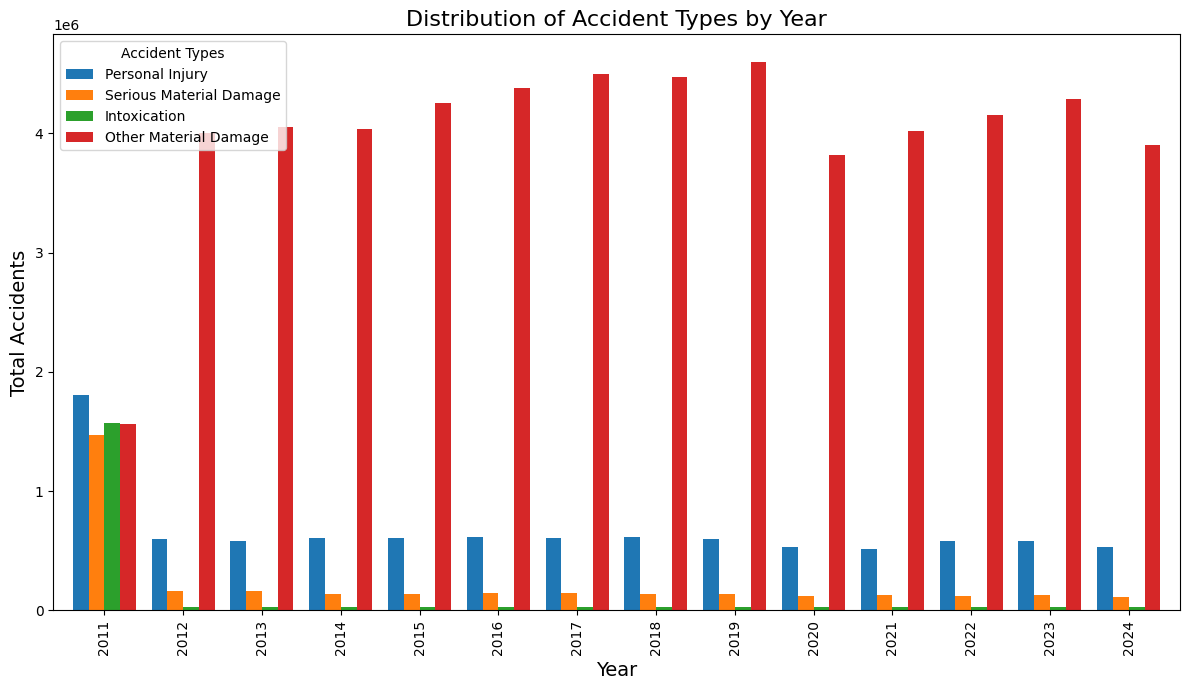

In [17]:
plt.figure(figsize=(12, 7))
accidents_by_year = df.groupby('Year')[accident_types].sum().reset_index()

accidents_by_year.set_index('Year')[accident_types].plot(kind='bar', width=0.8, figsize=(12, 7))


plt.title('Distribution of Accident Types by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)


plt.legend(title='Accident Types', labels=['Personal Injury', 'Serious Material Damage', 'Intoxication', 'Other Material Damage'])

plt.tight_layout()
plt.show()

### Interpretation

*The data shows that the majority of accidents result in material damage only. Accidents involving personal injuries occur less frequently, followed by serious accidents with significant material damage. The least common category is accidents caused by intoxicated individuals (due to drugs or alcohol).* 

- ### Influence of Speed Limits & Infrastructure:

From the data that have we can see that on Highways are less accidents than in urban areas. Probably the frequency of traffic is higher in cities and mostly there are lighter accidents, with smaller material damages. On other side on highways are higher speeds and unfortunately there are more injuries and bigger material damages. This is our hypothesis, because in this table we don't have precise data about that and that can be part of some further research.

### **2. Accident Classification by Year**

####  Differentiate between accidents causing injuries and those causing only property damage.

In [18]:
accident_types = [
    'Personal Injury Accidents', 
    'Serious Accidents (Material Damage)', 
    'Other Accidents (Intoxication)', 
    'Other Accidents (Material Damage)'
]

# Compute new accident categories
accidents_by_year['Injury Accidents'] = accidents_by_year['Personal Injury Accidents'] + accidents_by_year['Serious Accidents (Material Damage)']
accidents_by_year['Material Damage Accidents'] = accidents_by_year['Other Accidents (Intoxication)'] + accidents_by_year['Other Accidents (Material Damage)']

# Keep Year column and new accident categories
accidents_by_year = accidents_by_year[['Year', 'Injury Accidents', 'Material Damage Accidents']]

# Display the updated DataFrame
print(accidents_by_year)

    Year  Injury Accidents  Material Damage Accidents
0   2011         3281523.0                  3139747.0
1   2012          763568.0                  4040118.0
2   2013          743858.0                  4084164.0
3   2014          745828.0                  4067542.0
4   2015          748870.0                  4284792.0
5   2016          759566.0                  4411088.0
6   2017          754234.0                  4531962.0
7   2018          755764.0                  4502697.0
8   2019          738664.0                  4631768.0
9   2020          648942.0                  3843851.0
10  2021          648221.0                  4045736.0
11  2022          699829.0                  4187351.0
12  2023          708644.0                  4317154.0
13  2024          646166.0                  3928998.0


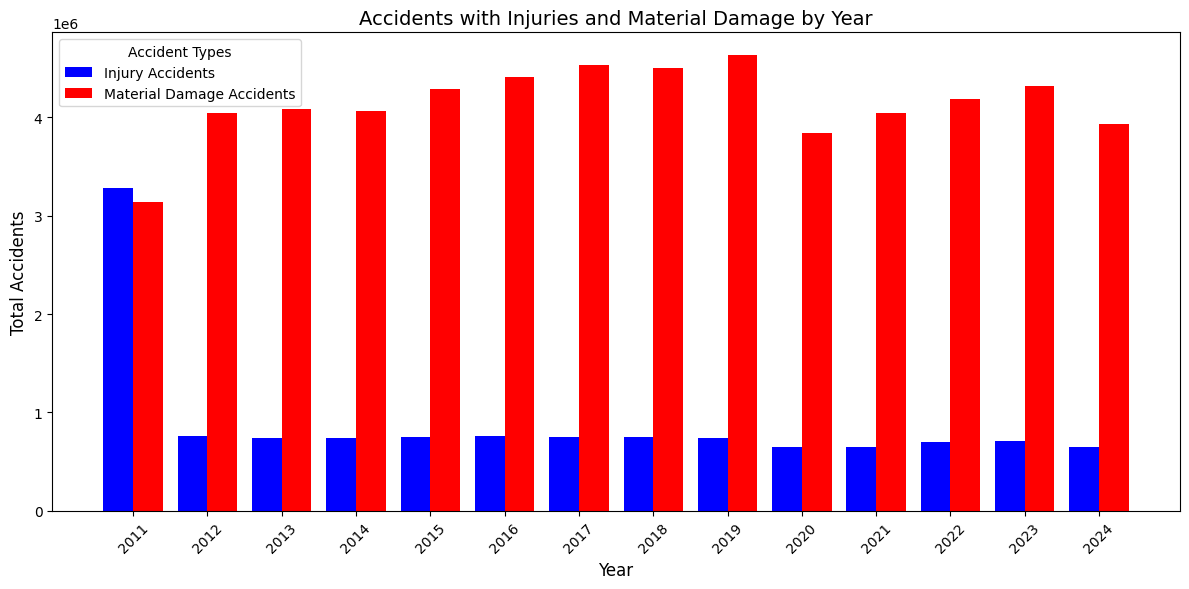

In [19]:
plt.figure(figsize=(12, 6))

# Define x-axis positions
x = np.arange(len(accidents_by_year['Year']))


plt.bar(x - 0.2, accidents_by_year['Injury Accidents'], width=0.4, label='Injury Accidents', color='b', align='center')
plt.bar(x + 0.2, accidents_by_year['Material Damage Accidents'], width=0.4, label='Material Damage Accidents', color='r', align='center')

plt.xticks(ticks=x, labels=accidents_by_year['Year'], rotation=45)

plt.title('Accidents with Injuries and Material Damage by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Accidents', fontsize=12)

plt.legend(title='Accident Types', fontsize=10)    

plt.ylim(bottom=0)
plt.tight_layout()


plt.show()

### Relation between location and type of accidents 

In [20]:

df = df[df["Location"] != "Total"]

# Group by location and compute the mean for relevant accident types
location_accidents = df.groupby("Location")[
    ['Personal Injury Accidents', 'Serious Accidents (Material Damage)', 
     'Other Accidents (Intoxication)', 'Other Accidents (Material Damage)', 'Total Accidents']
].mean().round(0)

# Compute injury and material damage accident categories
location_accidents["Injury Accidents"] = (
    location_accidents["Personal Injury Accidents"] + 
    location_accidents["Serious Accidents (Material Damage)"]
)

location_accidents["Material Damage Accidents"] = (
    location_accidents["Other Accidents (Intoxication)"] + 
    location_accidents["Other Accidents (Material Damage)"]
)

# Compute proportions of injuries and material damage accidents
location_accidents["Injury Accidents per Total"] = (
    location_accidents["Injury Accidents"] / location_accidents["Total Accidents"]
)

location_accidents["Material Damage per Total"] = (
    location_accidents["Material Damage Accidents"] / location_accidents["Total Accidents"]
)

# Convert proportions to percentages
location_accidents["Injury Accidents per Total"] = (location_accidents["Injury Accidents per Total"] * 100).round(1)
location_accidents["Material Damage per Total"] = (location_accidents["Material Damage per Total"] * 100).round(1)

# Rename the location labels
location_accidents = location_accidents.rename(index={
    'Inside built-up areas': 'Urban',
    'On motorways/freeways': 'Highway',
    'Outside built-up areas (excl. motorways/freeways)': 'Non-urban'
})

# Select relevant columns
location_accidents = location_accidents[["Injury Accidents per Total", "Material Damage per Total"]]

# Display the result
print(location_accidents)



           Injury Accidents per Total  Material Damage per Total
Location                                                        
Urban                            13.8                       85.6
Highway                          11.4                       88.8
Non-urban                        18.8                       83.7


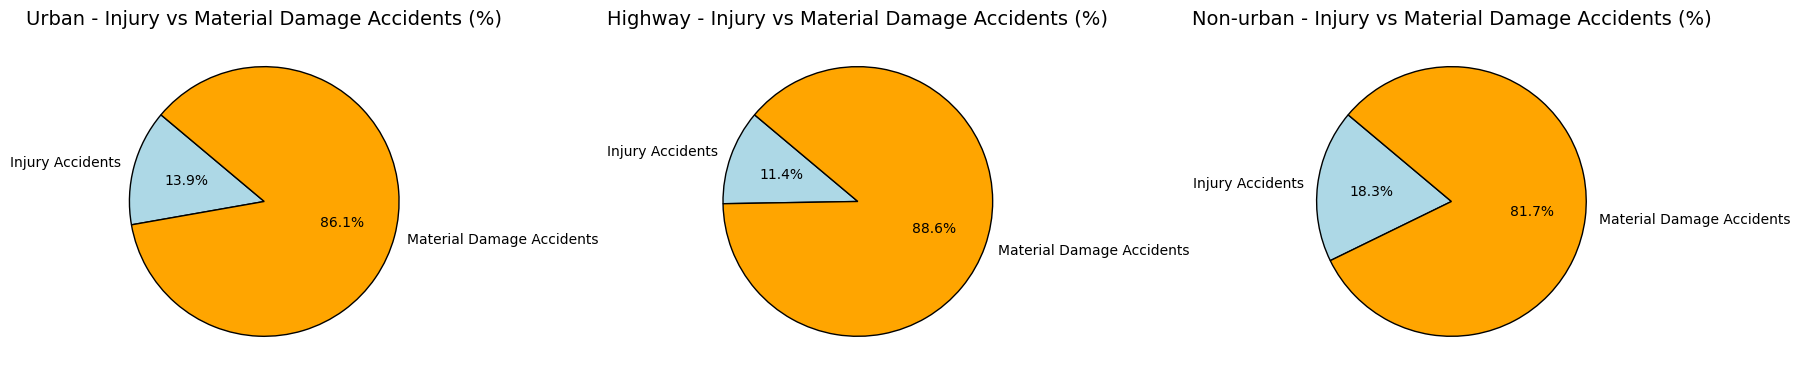

In [21]:
accidents_by_year_location = accidents_by_year_location.rename(columns={
    'Inside built-up areas': 'Urban',
    'On motorways/freeways': 'Highway',
    'Outside built-up areas (excl. motorways/freeways)': 'Non-urban'
})

# List of renamed locations you want to create pie charts for
locations_to_plot = [
    "Urban",
    "Highway",
    "Non-urban"
]

# Create a figure with subplots (3 pie charts side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Loop through each location and create a pie chart in the corresponding subplot
for i, location in enumerate(locations_to_plot):
    # Data for the pie chart (Injury Accidents vs Material Damage Accidents)
    data = [
        location_accidents.loc[location, "Injury Accidents per Total"],
        location_accidents.loc[location, "Material Damage per Total"]
    ]
    
    # Labels and colors for the pie chart
    labels = ["Injury Accidents", "Material Damage Accidents"]
    colors = ["lightblue","orange"]

    # Create the pie chart in the current subplot
    axes[i].pie(data, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
    
    # Set title for each pie chart
    axes[i].set_title(f"{location} - Injury vs Material Damage Accidents (%)", fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

### Interpretation

*The analysis reveals that non-urban areas experience the highest percentage of injury accidents (18.3%), likely due to higher speeds, lack of lane barriers, and fewer traffic controls. On the other hand, highway and urban areas also show significant material damage, but injury rates are lower in these areas.*


*This suggests that while accidents in non-urban areas tend to be more severe, urban areas have a higher incidence of property damage*

### **3. Seasonal & Monthly Patterns**

-  #### Peak Accident Periods

In [22]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df['Months'] = pd.Categorical(df['Months'], categories=month_order, ordered=True)
accident_by_months_avg = df.groupby('Months')['Total Accidents'].mean().round(0).sort_values(ascending=False)   
print(accident_by_months_avg)


Months
October      77210.0
July         74985.0
November     73335.0
December     72628.0
May          72080.0
June         71158.0
September    70429.0
April        66894.0
March        65668.0
January      64128.0
August       63074.0
February     59618.0
Name: Total Accidents, dtype: float64


C:\Users\milos\AppData\Local\Temp\ipykernel_41220\1423121142.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_by_months_avg = df.groupby('Months')['Total Accidents'].mean().round(0).sort_values(ascending=False)


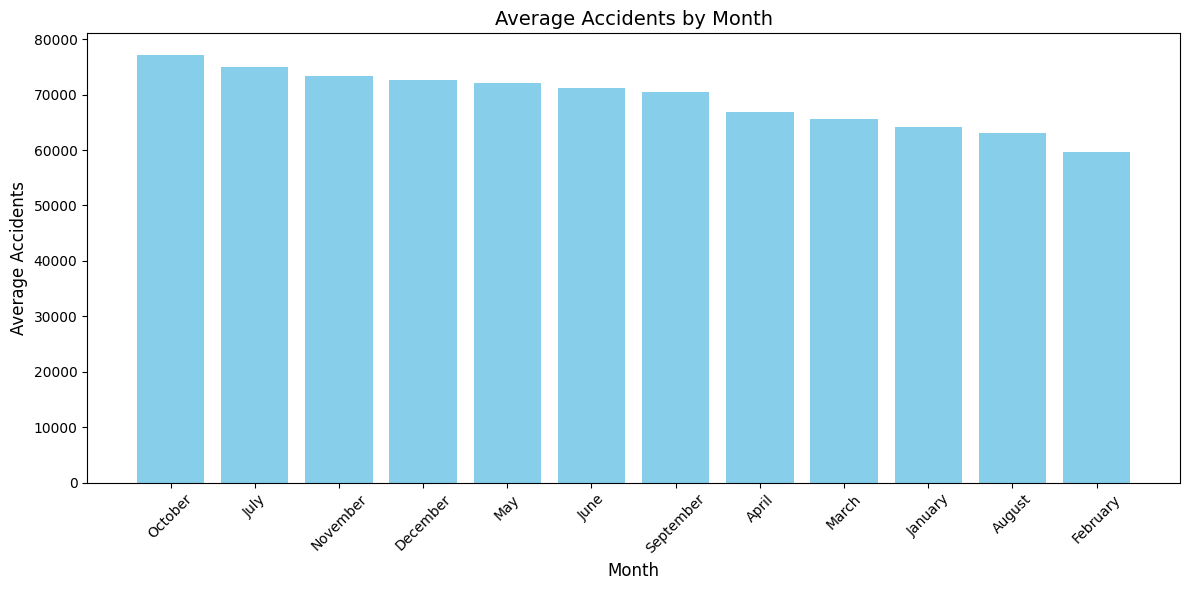

In [29]:
plt.figure(figsize=(12, 6))

plt.bar(accident_by_months_avg.index, accident_by_months_avg, color='skyblue')

plt.title('Average Accidents by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Accidents', fontsize=12)

plt.xticks(rotation=45)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

### Interpretation 

*The highest number of accidents occurs in October, July, and November, suggesting seasonal or weather-related factors may contribute to increased risks.* 

*Conversely, February and August have the lowest accident counts, possibly due to fewer vehicles on the road during winter and summer vacation periods*

In [4]:

seasons = {
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Fall': ['September', 'October', 'November'],
    'Winter': ['December', 'January', 'February'],
    'Christmas': ['December'],
    'Eastern': ['April'],
    'School Holidays': ['July', 'August'],
    'Winter Holidays': ['December', 'January'],
    'Q1': ['January', 'February', 'March'],
    'Q2': ['April', 'May', 'June'],
    'Q3': ['July', 'August', 'September'],
    'Q4': ['October', 'November', 'December']
}

expanded_rows = []


for index, row in df.iterrows():
    month = row['Months'] 
    accidents = row['Total Accidents']  

    # Find all seasons/events that include this month
    for season, months in seasons.items():
        if month in months:
            expanded_rows.append({'Season': season, 'Total Accidents': accidents})

# Convert the expanded list into a new DataFrame
df_expanded = pd.DataFrame(expanded_rows)

# Group by season and calculate the average accidents per season
season_accidents = df_expanded.groupby('Season')['Total Accidents'].mean().round(0).sort_values(ascending=False)

# Print the results
print(season_accidents)




Season
Fall               112448.0
Q4                 111715.0
Q2                 107581.0
Q3                 107500.0
Summer             107421.0
Christmas          106830.0
School Holidays    106560.0
Spring             104034.0
Eastern            102836.0
Winter Holidays    101314.0
Winter              97255.0
Q1                  94707.0
Name: Total Accidents, dtype: float64


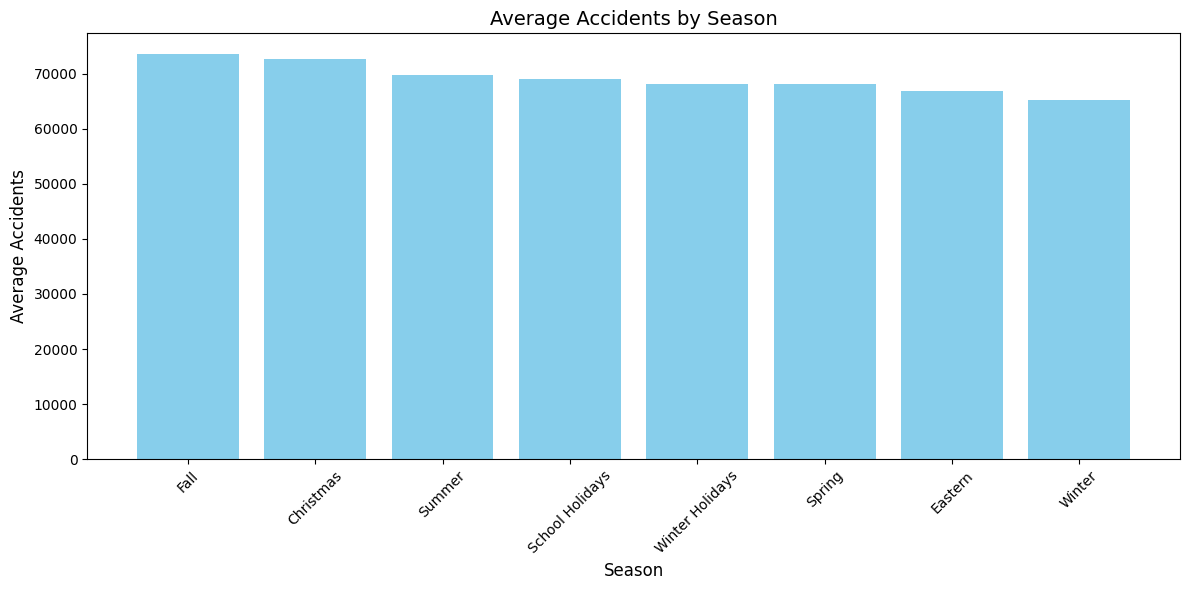

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(season_accidents.index, season_accidents, color='skyblue')

plt.title('Average Accidents by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)       
plt.ylabel('Average Accidents', fontsize=12)

plt.xticks(rotation=45)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

### Interpretation

*The data indicates that the Fall season experiences the highest average number of accidents, followed closely by Summer. These seasons/events have accident rates of over 100,000 on average. On the other hand, Winter has the lowest average number of accidents, with a value slightly below 100,000.*

In [15]:

quartals = {
    'Q1': ['January', 'February', 'March'],
    'Q2': ['April', 'May', 'June'],
    'Q3': ['July', 'August', 'September'],
    'Q4': ['October', 'November', 'December']
}

expanded_rows = []

for index, row in df.iterrows():
    month = row['Months']
    accidents = row['Total Accidents']

    for quartal, months in quartals.items():
        if month in months:
            expanded_rows.append({'Quartal': quartal, 'Total Accidents': accidents})

df_expanded = pd.DataFrame(expanded_rows)

quartals_accidents = (
    df_expanded.groupby('Quartal')['Total Accidents']
    .mean()
    .round(0)
    .sort_values(ascending=False)
)

print(quartals_accidents)


Quartal
Q4    111715.0
Q2    107581.0
Q3    107500.0
Q1     94707.0
Name: Total Accidents, dtype: float64


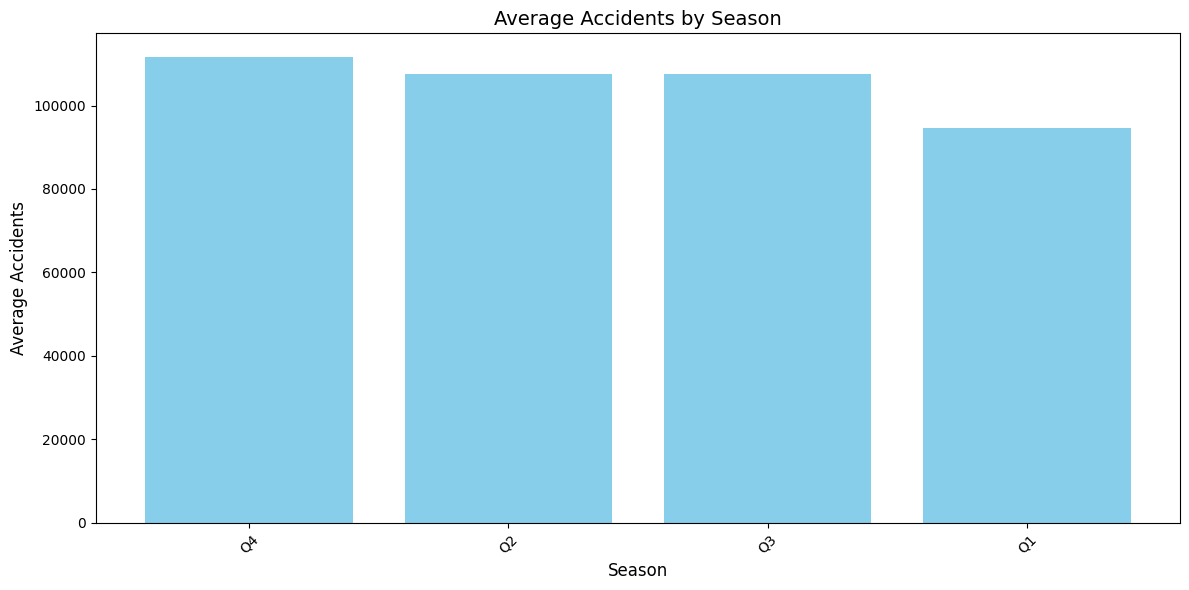

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(quartals_accidents.index, quartals_accidents, color='skyblue')

plt.title('Average Accidents by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)       
plt.ylabel('Average Accidents', fontsize=12)

plt.xticks(rotation=45)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()